# Import bibliotek

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych

In [15]:
tytanic = pd.read_csv('train.csv')
#testy = pd.read_csv('test.csv')
#print(tytanic)
#tytanic.head()
display(tytanic[0:20])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
tytanic.shape

(891, 12)

# Przygotowanie danych

In [4]:
New_tytanic = tytanic.drop(['Name', 'Ticket', 'PassengerId','Cabin'], axis = 1)
New_tytanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Usunięcie pustych rekordów
New_tytanic = New_tytanic.dropna()

In [6]:
# Posortowanie
#New_tytanic = New_tytanic['Pclass','Sex','Age']

In [7]:
X = New_tytanic.iloc[:, 1:8]
y = New_tytanic.iloc[:, 0]
New_tytanic.shape

(712, 8)

In [8]:
X2 = pd.get_dummies(X)

X2 = X2.drop(['Embarked_Q', 'Sex_male'], axis = 1)

X2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,1,0,1
3,1,35.0,1,0,53.1000,1,0,1
4,3,35.0,0,0,8.0500,0,0,1


# Podział na dane uczące i testowe

In [9]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X2, y, test_size = 0.3, random_state = 10)

# Trenowanie modelu

In [10]:
# Testowanie
from sklearn.ensemble import RandomForestClassifier as RFC

test_scores = []
train_scores = []
for i in range(1,20):
    RFC_entropy = RFC(n_estimators = 300, criterion ='entropy', random_state = 10, max_depth = i)
    RFC_entropy.fit(X_train, y_train)
    test_scores.append(RFC_entropy.score(X_test, y_test))
    train_scores.append(RFC_entropy.score(X_train, y_train))



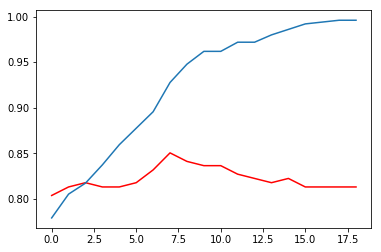

In [11]:
plt.plot(test_scores, color = "red")
plt.plot(train_scores)

In [12]:
# Wybór algorytmu
classifier = RFC(n_estimators = 250, criterion = 'entropy', random_state = 10, max_depth = 8)

#trenowanie
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

# Ocena modelu

In [13]:
test_score = classifier.score(X_test, y_test)
#wynik
print(test_score)

0.8504672897196262


# Porównanie wyników testowych

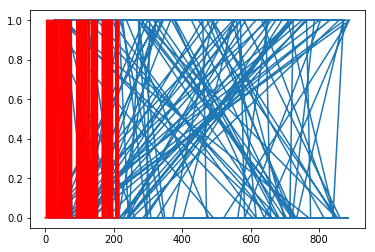

In [14]:
y_pred = classifier.predict(X_test)
#import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred, color = 'red')